# 7.지도학습>회귀>평균제곱근오차_손실함수
___

## 주제 

- 영화에 대한 고객들의 평가 데이터를 가지고, 분석, 예측등등 회귀모델을 통해서 구현
- 회귀의 평가 지표를 사용
- 특성들의 배치와 조합에 따라 지표는 다르게 나올수 있다 => 데이터를 준비하는 과정에 순서, 사용하는 특성 종류등도 영향을 미친다

---

In [1]:
#  패키지 정보 
import pandas as pd 
import numpy as np

# 1. 데이터 로드 
---

### 고객 정보 로드
---

In [2]:
# 고객 정보 로드 
name = 'u.user'
path = f'../input/ml-100k/{name}' 

users = pd.read_csv(path, sep = '|')

In [3]:
# 그냥 데이터를 올려보니 1번 데이터가 컬럼으로 올라간 것을 확인 -> 누락확인 
# 컬럼을 지정해서 데이터를 읽어야한다
users.head(5)

,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


In [4]:
# 사용할 이름을 리스트에 담는다 
cols = ['uid','age','s','job','zip_code'] 
cols

['uid', 'age', 's', 'job', 'zip_code']

In [5]:
# 고객 정보 로드 
name = 'u.user'
path_name = f'../input/ml-100k/{name}' 

# 컬럼 생성 name = 리스트에 담은 컬럼명을 names에 추가 
users = pd.read_csv(path_name, sep = '|', names=cols)
# 컬럼이 추가된것을 확인 할수있다.
users.head(1)

,uid,age,s,job,zip_code
0,1,24,M,technician,85711


### 영화 정보 로드 
---

In [6]:
# 영화 정보 로드 
name = 'u.item'
path = f'../input/ml-100k/{name}' 

# encoding='latin1'??? 
movies = pd.read_csv(path, sep = '|', encoding='latin1')
movies.head(5)

,1,Toy Story (1995),01-Jan-1995,Unnamed: 3,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0.1,0.2,1.1,1.2,...,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
### [read_csv 참고 자료 ](https://useful-jang.tistory.com/55)
---
+ 추가로 
- encoding='latin1'
    - 주어진 데이터가 일반적인 인코딩이 아니라 'latin1' 이라는 방식으로 인코딩 되어 있어서, 글자가 깨지지 않게 하기 위해 적어둔 것
    - 인터넷에서 csv 파일을 다운받아서, 무언가 글자가 깨어지면 인코딩 방식을 알아낸 후, 인코딩 옵션을 지정해서 불러오면 됨
    - [Standard Encodings - 참조](https://docs.python.org/3/library/codecs.html#standard-encodings)

In [7]:
cols = ['mid','title','release_date','video_release_date','url'] 
cols

['mid', 'title', 'release_date', 'video_release_date', 'url']

In [8]:
# 영화 정보 로드 
name = 'u.item'
path = f'../input/ml-100k/{name}' 

# encoding='latin1'??? 
# 이것도 컬럼의 누락이므로 추가 한다 
# usecols = 불러올 칼럼의 인덱스 번호나 이름을 지정한다 
movies = pd.read_csv(path, sep = '|', encoding='latin1' , names = cols, usecols=range(5))
movies.head(5)

,mid,title,release_date,video_release_date,url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [9]:
movies.shape , users.shape 

((1682, 5), (943, 5))

### 평점 정보 로드
---

In [10]:
# 평점 정보 로드 
name = 'u.data'
path = f'../input/ml-100k/{name}' 

# 컬럼 삽입 
cols = ['uid','mid','rating','date']
ratings = pd.read_csv( path ,sep='\t',names=cols) 
ratings.head(2)


# 881250949 -> 1970.01.01 00:00:00초부터 현재까지 진행된시간+9시간
#              시간형식 => long => yyyyMMdd hhmmss
# 881250949 :  -> yyyyMMdd hhmmss : 
# 시간 정보가 직관적이지 않다 직관적인 시간정보로 변환

,uid,mid,rating,date
0,196,242,3,881250949
1,186,302,3,891717742


In [11]:
ratings.date

0        881250949
1        891717742
2        878887116
3        880606923
4        886397596
5        884182806
6        881171488
7        891628467
8        886324817
9        883603013
10       879372434
11       879781125
12       876042340
13       891035994
14       888104457
15       879485318
16       879270459
17       879539794
18       874834944
19       892079237
20       886176814
21       892738452
22       877881320
23       874833878
24       887736532
25       879196566
26       892430094
27       883748450
28       875747401
29       876861185
           ...    
99970    879959573
99971    876037121
99972    877137447
99973    874792889
99974    876243046
99975    886031752
99976    891308019
99977    883445079
99978    875936424
99979    888640291
99980    888891900
99981    879445877
99982    875308510
99983    888528902
99984    887863914
99985    883789294
99986    880824288
99987    891406212
99988    892241344
99989    888637503
99990    882388897
99991    892

In [12]:
ratings.date = pd.to_datetime( ratings.date, unit='s')
ratings.head(2)

,uid,mid,rating,date
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22


In [13]:
ratings.shape

(100000, 4)

## 데이터 준비, 분석 
---
- 품질 향상
- 시각화 
- 통찰(일부진행)
    - 윈도우 x 
    - 하려면 맥이나 리눅스 

In [14]:
# DataFrame이 1개 이상으로 존재한다 -> 필연적 -> 병합과정
# merge, concat등
# movies + ratings 순으로 병합

---
### [concat 참고 자료 - ctrl+f 로 검색 하3](https://github.com/Jerrykim91/Bigdata_Analytics/blob/master/Build_Modeling/Ml/src/1_Sense%20of%20language%20translation%20services%20using%20Ml_full.ipynb)
---

In [15]:
#  컴켓은 차원을 설정 해주어야 한다 
df_concat = pd.concat([movies, ratings],axis=1)
df_concat.head(1)

,mid,title,release_date,video_release_date,url,uid,mid,rating,date
0,1.0,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,196,242,3,1997-12-04 15:55:49


In [16]:
movies_ratings = pd.merge(movies ,ratings)
movies_ratings.head(1)

,mid,title,release_date,video_release_date,url,uid,rating,date
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52


In [17]:
# 평점 데이터 기준으로 병합 완료 
movies_ratings.shape, users.shape

((100000, 8), (943, 5))

In [18]:
movies_ratings.dtypes

mid                            int64
title                         object
release_date                  object
video_release_date           float64
url                           object
uid                            int64
rating                         int64
date                  datetime64[ns]
dtype: object

In [19]:
users.dtypes

uid          int64
age          int64
s           object
job         object
zip_code    object
dtype: object

In [20]:
movies_ratings_users = pd.merge(movies_ratings, users)
movies_ratings_users.head(1)

,mid,title,release_date,video_release_date,url,uid,rating,date,age,s,job,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52,60,M,retired,95076


In [21]:
movies_ratings_users.shape

(100000, 12)

## 데이터 살펴보기
---
- 특성, 성향등의 데이터의 특징을 확인

In [26]:
# 평가를 가장 많이 받은 작품 상위 10개
movies_ratings_users.sort_values(["rating"], ascending= False)

,mid,title,release_date,video_release_date,url,uid,rating,date,age,s,job,zip_code
48743,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",518,5,1997-10-14 09:59:57,49,F,writer,99709
46595,705,Singin' in the Rain (1952),01-Jan-1952,NaN,http://us.imdb.com/M/title-exact?Singin'%20in%...,303,5,1997-11-14 00:25:05,19,M,student,14853
20919,1286,Shall We Dance? (1937),01-Jan-1937,NaN,http://us.imdb.com/M/title-exact?Shall%20We%20...,416,5,1998-04-22 02:52:29,20,F,student,92626
46621,780,Dumb & Dumber (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Dumb%20&%20Du...,303,5,1997-11-14 05:05:00,19,M,student,14853
20917,1262,Walking and Talking (1996),12-Jul-1996,NaN,http://us.imdb.com/M/title-exact?Walking%20and...,416,5,1998-04-22 02:43:39,20,F,student,92626
20914,1221,When a Man Loves a Woman (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?When%20a%20Ma...,416,5,1998-04-22 02:45:03,20,F,student,92626
46625,792,Bullets Over Broadway (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Bullets%20Ove...,303,5,1997-11-14 05:17:24,19,M,student,14853
20911,1189,Prefontaine (1997),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Prefontaine%2...,416,5,1998-04-22 02:58:37,20,F,student,92626
91551,48,Hoop Dreams (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Hoop%20Dreams...,615,5,1997-11-13 19:13:19,38,M,educator,27705
86864,1524,Kaspar Hauser (1993),07-Jun-1996,NaN,http://us.imdb.com/Title?Kaspar+Hauser+(1993),358,5,1998-03-30 14:50:18,40,M,educator,10022


In [30]:
movies_datas = movies_ratings_users[:]

In [40]:
# 평가를 가장 많이 받은 작품 상위 10개
# 작품별, 평가수를 구해라 -> 내림차순 정렬 -> 상위 10
# value_counts() - 값의 빈도를 계산해서 빈도를 보여줌 
top_ten = movies_datas.title.value_counts()[:10]
print(top_ten,'\nTop_ten = ',len(top_ten))

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64 
Top_ten =  10


In [55]:
# 평가 개수가 1개인 데이터만 모아라 
low_all = movies_datas.title.value_counts(ascending=True)

In [56]:
low_rate = 1
low_pick= low_all[low_all == low_rate]
print(low_pick,'\nLow_pick=',len(low_pick))

Fire on the Mountain (1996)                                  1
Brother's Kiss, A (1997)                                     1
Small Faces (1995)                                           1
Mostro, Il (1994)                                            1
Sunchaser, The (1996)                                        1
Bloody Child, The (1996)                                     1
The Courtyard (1995)                                         1
Modern Affair, A (1995)                                      1
Gate of Heavenly Peace, The (1995)                           1
Wife, The (1995)                                             1
Eighth Day, The (1996)                                       1
Brothers in Trouble (1995)                                   1
War at Home, The (1996)                                      1
King of New York (1990)                                      1
Farmer & Chase (1995)                                        1
Hostile Intentions (1994)                              

In [64]:
len(low_pick)/len(movies) * 100

7.966706302021404

In [ ]:
# 조건         : 평가 개수가 1개인 영화만
# 결과 or 수행 : 모아라
# 조건식
tmp = movie_datas.title.value_counts()
#res = tmp[  tmp <= 10  ]
low_rate = 1
res = tmp [tmp == low_rate]

# 전체 데이터중에 평점이 1개만 존재하는 영화의 비율
res.shape[0]/movies.shape[0]*100
# 통찰 => 평점은 특정 평가 개수 이상 존재할 경우만 인정 (검토)
# 임계값 설정 => 평점 개수 몇개 이상!!

In [65]:
tmp = movies_datas.title.value_counts()
low_rate = 1
res = tmp [tmp == low_rate]
# len(res) /len(movies)*100
res.shape[0]/movies.shape[0]*100

7.966706302021404

In [67]:
movies_datas.columns

Index(['mid', 'title', 'release_date', 'video_release_date', 'url', 'uid',
       'rating', 'date', 'age', 's', 'job', 'zip_code'],
      dtype='object')

In [69]:
# 제목 기준으로 데이터를 배치, 평가의 개수, 평균평점 2개를 feature로 
# 가지는 데이터 프레임을 생성하시오
# 인덱스 : 영화제목, 컬럼:평가개수, 평균평점
# 피벗 , 그룹바이 

features = {
    'rating' : [np.size, np.mean]
}
# 대타이틀 
movie_state = movies_datas.groupby('title').agg(features)
movie_state.head(2)

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000

In [70]:
movie_state.shape, movies.shape

((1664, 2), (1682, 5))

In [75]:
movie_state.shape[0] - movies.shape[0]

-18

In [95]:
evalu = movie_state.rating['size']
movies_100_over = movie_state[ evalu >= 100 ]
movies_100_over

rating          
                                                     size      mean
title                                                              
101 Dalmatians (1996)                                 109  2.908257
12 Angry Men (1957)                                   125  4.344000
2001: A Space Odyssey (1968)                          259  3.969112
Absolute Power (1997)                                 127  3.370079
Abyss, The (1989)                                     151  3.589404
Ace Ventura: Pet Detective (1994)                     103  3.048544
Adventures of Priscilla, Queen of the Desert, T...    111  3.594595
African Queen, The (1951)                             152  4.184211
Air Force One (1997)                                  431  3.631090
Aladdin (1992)                                        219  3.812785
Alien (1979)                                          291  4.034364
Alien 3 (1992)                                        100  2.830000
Alien: Resurrection (1997)                            124  3.096774
Aliens (1986)                                         284  3.947183
Amadeus (1984)                                        276  4.163043
American President, The (1995)                        164  3.628049
Amistad (1997)                                        124  3.854839
Annie Hall (1977)                                     180  3.911111
Apocalypse Now (1979)                                 221  4.045249
Apollo 13 (1995)                                      276  3.931159
Apt Pupil (1998)                                      160  4.100000
Army of Darkness (1993)                               116  3.431034
Arsenic and Old Lace (1944)                           115  4.078261
As Good As It Gets (1997)                             112  4.196429
Austin Powers: International Man of Mystery (1997)    130  3.246154
Babe (1995)                                           219  3.995434
Back to the Future (1985)                             350  3.834286
Basic Instinct (1992)                                 101  3.227723
Batman (1989)                                         201  3.427861
Batman Forever (1995)                                 114  2.666667
...                                                   ...       ...
Titanic (1997)                                        350  4.245714
To Kill a Mockingbird (1962)                          219  4.292237
Tombstone (1993)                                      108  3.666667
Tomorrow Never Dies (1997)                            180  3.427778
Top Gun (1986)                                        220  3.481818
Toy Story (1995)                                      452  3.878319
Trainspotting (1996)                                  250  3.884000
True Lies (1994)                                      208  3.562500
True Romance (1993)                                   104  3.615385
Truth About Cats & Dogs, The (1996)                   272  3.485294
Twelve Monkeys (1995)                                 392  3.798469
Twister (1996)                                        293  3.215017
Ulee's Gold (1997)                                    184  3.760870
Under Siege (1992)                                    124  3.290323
Unforgiven (1992)                                     182  3.868132
Usual Suspects, The (1995)                            267  4.385768
Vertigo (1958)                                        179  4.251397
Volcano (1997)                                        219  2.808219
Wag the Dog (1997)                                    137  3.510949
Waterworld (1995)                                     102  2.803922
Welcome to the Dollhouse (1995)                       112  3.723214
What's Eating Gilbert Grape (1993)                    115  3.539130
When Harry Met Sally... (1989)                        290  3.910345
While You Were Sleeping (1995)                        162  3.549383
William Shakespeare's Romeo and Juliet (1996)         106  3.594340
Willy Wonka and the Chocolate Factory (

In [97]:
# 이런 영화들 중에 평가가 100개이상만 모아라 
tmp = movies_100_over.sort_values( by = [('rating','mean')], ascending=False )
tmp.head()

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

In [98]:
tmp.tail(2)

rating          
                        size      mean
title                                 
Jungle2Jungle (1997)     132  2.439394
Cable Guy, The (1996)    106  2.339623

In [100]:
# 회원이 평가를 얼마나 했는가 기준점으로 확인
# 사용자별 평가 횟수
tmp = movies_datas.groupby('uid').size()
tmp[:5]

uid
1    272
2     62
3     54
4     24
5    175
dtype: int64

In [101]:
from matplotlib import pyplot as plt

In [102]:
tmp.sort_values( ascending=False ).head(2)

uid
405    737
655    685
dtype: int64

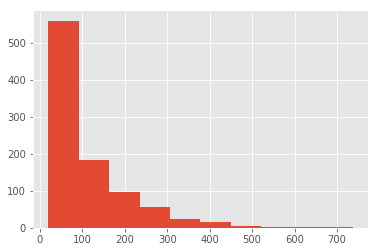

In [104]:
plt.style.use('ggplot')
tmp.sort_values( ascending=False ).hist()
# "지프의 법칙"을따르는 데이터 굴곡 모양이다. 롱테일분포
# 영화의 평가 개수가 많으면 많을수록 1개만 평가한 데이터도 많아진다

In [105]:
# 사용자별 평가 회수, 평균
features = {
    'rating' : [np.size, np.mean]
}
# 대타이틀 
user_state = movies_datas.groupby('uid').agg(features)
user_state.head(2)

rating          
      size      mean
uid                 
1      272  3.610294
2       62  3.709677

In [106]:
user_state.rating.describe()

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565
